**Final Project Submission**

Please fill out:
* Student names:

1. Nicole Bosibori
2. Monica Mwangi
3. Jane Njuguna
4. Shilton Soi
5. Loise Mburuga

* Student pace: part time
* Scheduled project review date/time:
* Instructor name:
1. Noah Kandie
2. William Okomba
* Blog post URL:


# **INTRODUCTION**


In the fast-paced world of real estate, providing clients with accurate insights is key. Real estate agencies guide homeowners through crucial decisions like pricing, market analysis, and property inspections. This project aims to equip agencies with a powerful regression-based tool. This tool predicts potential property value increases based on factors like bedrooms, year built, floors, living space, condition, and location. With this model, agencies can offer tailored advice, ensuring clients make informed decisions for maximizing returns in the competitive market

# **BUSINESS UNDERSTANDING**

The dataset provided contains information about various houses sold, including their features and sale prices. This data can be valuable for real estate agencies in several ways:

Market Analysis: The agency can use the data to analyze market trends, such as which types of houses are in high demand, which neighborhoods have seen increasing property values, and how various features (like waterfront views or renovated properties) affect selling prices.

Property Valuation: Understanding the relationship between house features and sale prices can help the agency accurately value properties for sellers and buyers, ensuring fair and competitive pricing.

Targeted Marketing: By identifying patterns in buyer preferences, the agency can tailor marketing efforts to attract potential buyers interested in specific types of properties or neighborhoods.

# **DATA UNDERSTANDING**

King County, Washington, located in the northwestern United States, boasts a vibrant housing market anchored by the bustling city of Seattle. Over the years, the county has seen remarkable growth, driven by its thriving economy and cultural significance. This has attracted a surge of residents, spurring high demand for housing across urban and suburban landscapes. Seattle, renowned for its striking skyline, has become particularly desirable for tech professionals and city enthusiasts alike. Known for its competitiveness, King County's real estate market offers diverse neighborhoods catering to various preferences, from historic districts to contemporary suburban developments.

**Target Variable**

price: Sale price of the house .

**Unique identifier**

id - Unique identifier for a house

**Property Characteristics:**

bedrooms: Number of bedrooms.

bathrooms: Number of bathrooms.

sqft_living: Square footage of living space in the home.

sqft_lot: Square footage of the lot.

floors: Number of floors (levels) in the house.

waterfront: Indicates whether the house is on a waterfront (categorical: YES/NO).

view: Quality of view from the house, categorized into various types.

condition: Overall condition of the house, categorized based on maintenance.

grade: Overall grade of the house, reflecting construction and design quality.

**Additional Features:**

sqft_above: Square footage of house apart from the basement.

sqft_basement: Square footage of the basement.

yr_built: Year when the house was built.

yr_renovated: Year when the house was renovated.

zipcode: ZIP Code of the property.

lat: Latitude coordinate of the property.

long: Longitude coordinate of the property.

sqft_living15: Square footage of interior housing living space for the nearest 15 neighbors.

sqft_lot15: Square footage of the land lots of the nearest 15 neighbors.

# **PROBLEM STATEMENT**

In King County,stakeholders in the real estate industry face challenges in understanding the factors influencing property valuation and market trends. This study seeks to address these challenges by analyzing the complexies between property features, location-related factors, market preferences, and temporal dynamics. By gaining insights into these factors, stakeholders can make more informed decisions regarding property investments, pricing strategies, and market positioning. Ultimately, the goal is to provide actionable insights that empower stakeholders to navigate and succeed in the dynamic King County real estate market.

# **OBJECTIVES**


**Main Objective:**

The primary objective of this project is to construct a predictive regression model to aid real estate agencies in advising clients on house prices. The model is designed to forecast potential fluctuations in property value based on property characteristics, providing valuable insights to empower clients in making well-informed investment decisions.

**Specific Objectives:**

i). Identify Key Factors Influencing House Prices:

Examine various features, such as bedrooms, bathrooms, and square footage, to determine their impact on sale price. Investigate location-related attributes like zip code and geographic coordinates to further understand their influence on property prices.

ii). Evaluate Model Performance:

Utilize metrics such as mean squared error, R-squared values, and residual analysis to assess the model's effectiveness in accurately predicting house prices.

iii). Offer Actionable Recommendations:

Provide practical suggestions to real estate agencies for enhancing profitability and market presence. Utilize insights derived from the model to optimize marketing strategies and improve overall decision-making processes.

# **TABLE OF CONTENT**
1.   Data Preparation
2.   Data cleaning
1.   Exploratory data analysis
2.   Statistical Analysis
1.   Modelling
2.   Regression Results
1.   Conclusion
2.   Reccomendations









# **1. DATA PREPARATION**

In [ ]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.

from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF).
from statsmodels.graphics.regressionplots import plot_partregress_grid  # For partial regression plots.
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets.
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection.
from sklearn.preprocessing import StandardScaler  # Standardizing/Scaling features.
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features.
from sklearn.linear_model import LinearRegression  # Linear Regression model.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for model performance.
import statsmodels.api as sm
from scipy.stats import kstest

 # Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import f_oneway  # One-way ANOVA statistical test.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.
import warnings  # handle warnings during code execution.
warnings.filterwarnings("ignore")  # Ignore warnings to improve code readability.


In [ ]:
# Loading and preview of the dataset
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**The columns have three data types**:

- Integers which include id,bedrooms,sqft_living,sqft_lot,sqft_above,yr built,zipcode,sqft living15,sqft lot15

- Float data types include price,bathrooms,floors,year renovated,latitudes and longitudes

- Object data type include the columns date,waterfront,view,condition,grade and sqft basement.

The data contains 21597 rows and 21 columns

# **2. DATA CLEANING**

Data cleaning involves the process of identifying and resolving issues related to the quality of the dataset. Its primary objective is to ensure that the data is accurate, consistent, and devoid of errors. Below are some of the data cleaning and preparation methods that were employed:

1.  Handling Missing Values
2.  Handling Duplicates
3.  Dealing with placeholders:
4.  Transforming data
5.  Handling outliers




In [ ]:
# Create a new dataframe of the raw data to clean
df1 = pd.read_csv("kc_house_data.csv")

In [ ]:
# Dropping columns
df1 = df1.drop(['date','long','lat','zipcode'], axis=1)
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287


**Reasons**

They do not have an impact in our final objectives and to decompress the data we can remove them

In [ ]:
# calculate the percentage of missing columns
df1.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

**Handling missing values in categorical columns**

The categorical columns are waterfront which contains 2376 missing values and view which contains 63 missing values.

In [ ]:
# Change waterfront missing value to NO, then to binary values.
df1.loc[df1.waterfront.isnull(), 'waterfront'] = 'NO'
df1['waterfront'] = df['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

In [ ]:
# Change view missing value to NONE, then to numerical ordered values.
df1.loc[df.view.isnull(), 'view'] = "NONE"
view_dict = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
df1['view'].replace(view_dict, inplace=True)

**REASONS**

**waterfront Missing Values:**
- Missing values in the 'waterfront' column were replaced with 'NO' since absence of information suggests the property lacks a waterfront feature and the majority data was 'NO' thats not far from the truth

**View Missing Values:**
- Missing values in the view column were replaced with 'NONE', indicating that the property doesn't have a specified view also the majority was NONE so we are not far from the truth.


**Handling missing values in numerical columns**

The numerical column is the year renovated with 3842 missing values .

In [ ]:
# Replace missing values in 'yr_renovated' with 0
df1.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0

# Create a new column 'renovated' based on the 'yr_renovated' values
df1['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

**REASON**

yr_renovated missing Values:

Replace missing values in 'yr_renovated' with 0 since the missing value indicates that the property has not been renovated.

Adding column renovated accounts for the difference in price for a renovated house over one that is not

In [ ]:
# Confirm missing values are fixed
df1.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

**CHECKING FOR DUPLICATES**

Based of the data the id column is the column we are worried about it having duplicates since it is a unique identifier for each property

In [ ]:
# Checking for duplicates using the 'id' column
df1[df1.duplicated(subset=["id"])]


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,Average,8 Good,1290,290.0,1939,0.0,1570,4500,0
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,Average,11 Excellent,2690,1600.0,1997,0.0,3860,11244,0
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0,0,Average,6 Low Average,960,280.0,1922,1984.0,1820,7460,1
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0,0,Average,6 Low Average,1000,0.0,1943,0.0,1020,7138,1
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0,0,Very Good,7 Average,1100,1080.0,1954,0.0,1810,6929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,645000.0,4,3.50,2910,5260,2.0,0,0,Average,9 Better,2910,0.0,2012,0.0,2910,5260,0
20597,2724049222,220000.0,2,2.50,1000,1092,2.0,0,0,Average,7 Average,990,10.0,2004,0.0,1330,1466,0
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,1,0,Average,8 Good,2680,0.0,2013,0.0,2680,5992,0
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,Average,7 Average,1200,0.0,1933,0.0,1130,1598,0


In [ ]:
# Dropping the duplicated data based on the 'id' column
df1.drop_duplicates(subset=["id"], inplace=True)


**REASON**

Removing duplicates leads to a more accurate representation of the dataset since duplicate entries in the id column can introduce inconsistencies during the analysis and modeling.

In [ ]:
# confirm duplicates were handled
df1[df1.duplicated(subset=["id"])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated


**CHECKING FOR PLACEHOLDERS**

Placeholders are values used to denote missing, unknown, or invalid data within a dataset. Common examples include "N/A", "-", "UNKNOWN", "NULL", and specific numeric values like 9999 or -9999. It's important to identify and handle placeholders properly during data preprocessing to ensure accurate analysis and modeling.

In [ ]:
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df1.columns:
    unique_values = df1[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df1[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")


Column 'sqft_basement': Found 452 occurrences of potential placeholder '?'


In [ ]:
# Replace '?' values in the sqft_basement column with '0' and convert to float
df1['sqft_basement'] = df1['sqft_basement'].replace('?', '0').astype(float)

# Create basement column as binary value (0 for no basement, 1 for basement present)
df1['basement'] = df1['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
# confirm no more placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df1.columns:
    unique_values = df1[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df1[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No placeholders found in the DataFrame.")

No placeholders found in the DataFrame.


**EXPLANATION**

The use of '?' as a placeholder in the 'sqft_basement' column indicates missing or unknown values that need to be handled

Adding a new column basement also improves on the model we will create to affect prices

**TRANSFORMING THE DATA**

In [ ]:
df1.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
sqft_living15      int64
sqft_lot15         int64
renovated          int64
basement           int64
dtype: object

In [ ]:
# Define the mapping for condition
cond_dict = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

# Replace condition values with numerical ordered values
df1['condition'].replace(cond_dict, inplace=True)

# Extract the numerical part of grade and convert to integer
df1['grade'] = df1['grade'].map(lambda x: int(x.split(' ')[0]))



In [ ]:
# Confirm all data has been transformed
df1.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
sqft_living15      int64
sqft_lot15         int64
renovated          int64
basement           int64
dtype: object

**EXPLANATIONS**

1.Condition column

Replace categorical values in the condition column with numerical ordered values for consistent representation and captures the ordinal nature of condition ratings.

2.Grade Column:

Parsing the grade column to extract the numerical part and converting it to an integer ensures a consistent numerical representation.

**Handling outliers**

Text(0.5, 1.0, 'Before Removing Outliers')

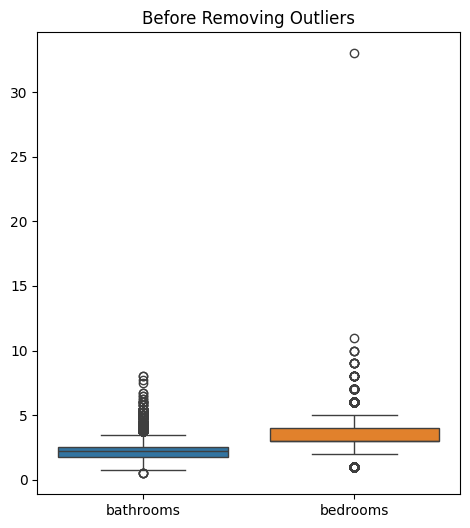

In [ ]:
# Before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df1[['bathrooms', 'bedrooms']])
plt.title('Before Removing Outliers')

In [ ]:
# Remove outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


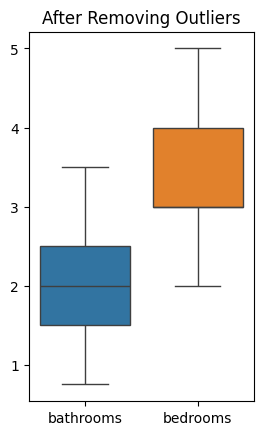

In [ ]:
# Remove outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered[['bathrooms', 'bedrooms']])
plt.title('After Removing Outliers')

plt.show()

**Reason**

To remove values that were out of bound

 # **3.EXPLORATORY DATA ANALYSIS**
1.   Univariate Analysis
2.   Bivariate Analysis
1.   MultiVariate Analysis






**Univariate Analysis**

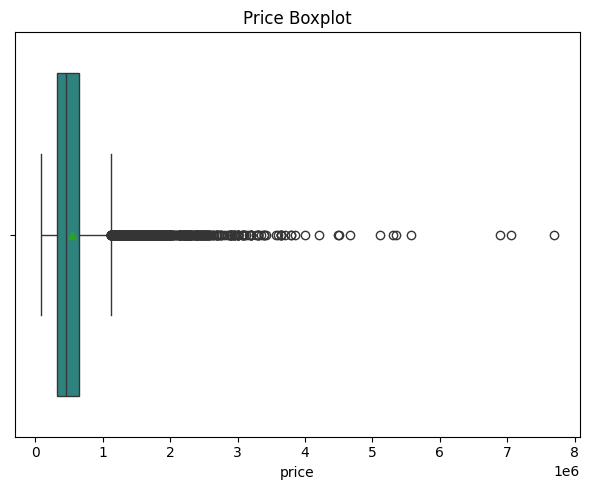

In [ ]:
plt.figure(figsize=(6, 5))

# Price boxplot

sns.boxplot(x=df1['price'], palette='viridis', showmeans=True)
plt.title('Price Boxplot')

plt.tight_layout()
plt.show()

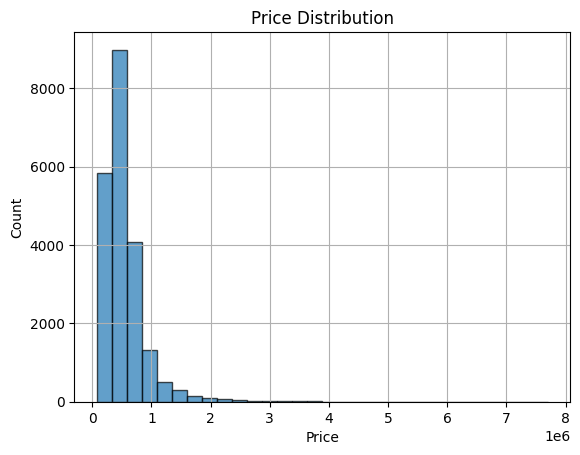

In [ ]:
# Price distribution plot
prices = df1['price']
plt.hist(prices, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.grid(True)
plt.show()

**Conclusion**

This graph shows the distribition of house prices in the data. According to this graph, most houses cost less than 1,000,000.

**Bivariate Analysis**

In [ ]:
# Define the labels with ranges
labels = ["70K-100K", "100K-300K", "300K-600K", "600K-1M", "1M-2M", "2M-5M", "5M-8M"]


# Cut the data into the specified ranges and assign labels
dfpr = pd.DataFrame(df1)
dfpr["pricerange"] = pd.cut(dfpr.price,
                                  bins=[70000, 100000, 300000, 600000, 1000000, 2000000, 5000000, 8000000],
                                  labels=labels)

# Count the occurrences of each category
counts = dfpr['pricerange'].value_counts()
print(counts)

pricerange
300K-600K    10692
600K-1M       4763
100K-300K     4485
1M-2M         1252
2M-5M          191
70K-100K        30
5M-8M            7
Name: count, dtype: int64


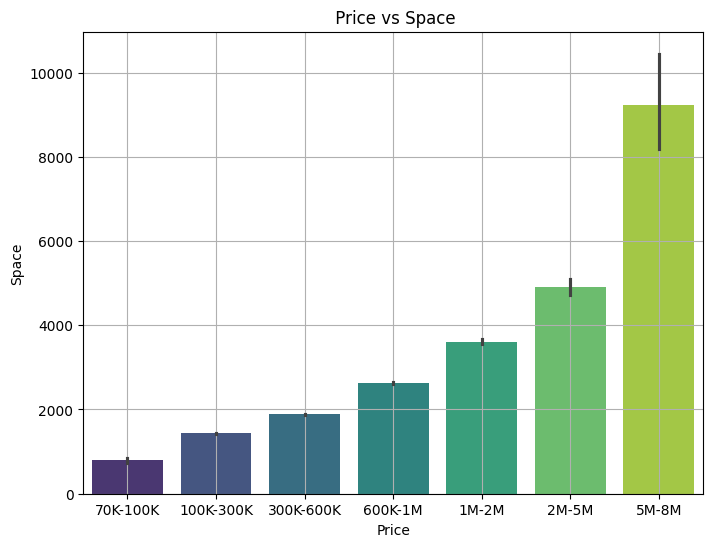

In [ ]:
price_sf = pd.DataFrame(dfpr)

# Bar graph of Price against Living Space
plt.figure(figsize=(8, 6))
sns.barplot(data=price_sf, x='pricerange', y='sqft_living', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Space')
plt.title(' Price vs Space')
plt.grid(True)
plt.show()

**Conclusion**

This graph shows that bigger houses tend to have a higher price, so a house worth about 90,000 is expected to be smaller than a house worth about 6,000,000.
We know that most houses cost less than 1,000,000 therefore, this indicates that most houses have less than 3000 square feet of living space and Houses with more than 4000 square feet of living space cost from 2,000,000

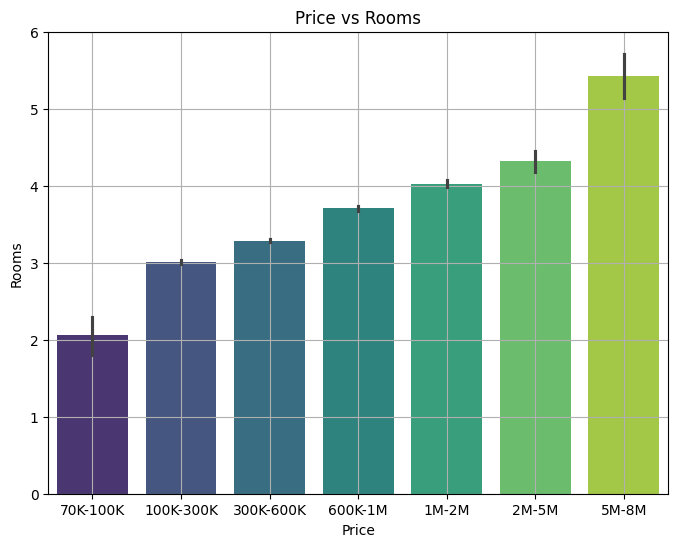

In [ ]:
price_rm = pd.DataFrame(dfpr)

# Bar graph of Price against Rooms
plt.figure(figsize=(8, 6))
sns.barplot(data=price_rm, x='pricerange', y='bedrooms', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.title('Price vs Rooms')
plt.grid(True)
plt.show()

**Conclusion**

According to this graph, house prices increases with number of rooms, therefore houses with 5 or more rooms sell at around 5,000,000 while those with 2 or less rooms sell at around 70,000. We can also conclude that most houses have less than 4 bedrooms and the ones that have 4 or more bedrooms cost more than 1,000,000

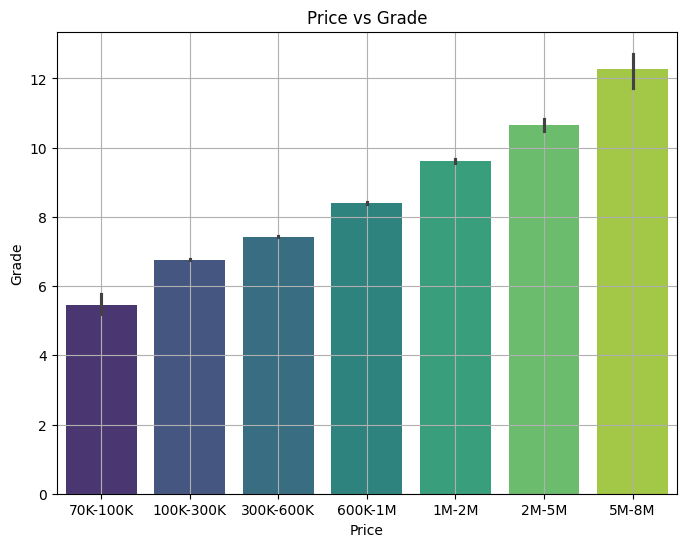

In [ ]:
price_gr = pd.DataFrame(dfpr)

# Bar graph of Price against Grade
plt.figure(figsize=(8, 6))
sns.barplot(data=price_gr, x='pricerange', y='grade', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Grade')
plt.title('Price vs Grade')
plt.grid(True)
plt.show()

**Conclusion**

Houses with higher grades tend to be of higher quality therefore they also have a higher price, for instance houses worth about 80,000 tend to have a lower grade (5 - 7) while houses worth about 6,000,000 tend to have a higher grade (12 - 13). Since most houses cost less than 1,000,000, from this graph we can conclude that most houses have a grade of 7(average) and 8 (good)

**MultiVariate Analysis**

In [ ]:
df2 = pd.DataFrame(df1)


In [ ]:
drop_var = ['id', 'yr_renovated','sqft_basement']
dfcor = df2.drop(drop_var, axis=1)


correlation = dfcor.corr()['price'].drop('price')  # Drop 'price' column from correlation calculation

In [ ]:
correlation

bedrooms         0.309453
bathrooms        0.526229
sqft_living      0.701875
sqft_lot         0.089111
floors           0.256286
waterfront       0.058080
view             0.393113
condition        0.034779
grade            0.668020
sqft_above       0.605294
yr_built         0.052906
sqft_living15    0.584549
sqft_lot15       0.082438
renovated        0.051166
basement         0.177593
Name: price, dtype: float64

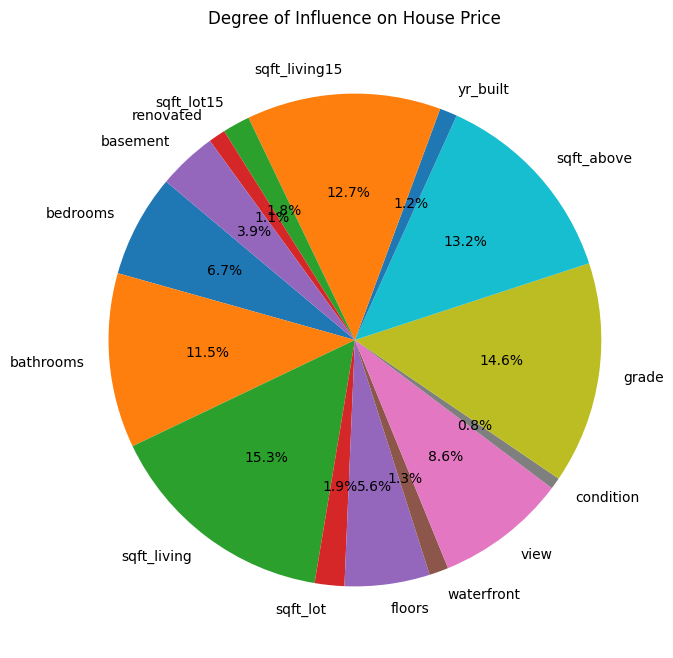

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(correlation.abs(), labels=correlation.index, autopct='%1.1f%%', startangle=140)
plt.title('Degree of Influence on House Price')
plt.show()


**Conclusion**

The piechart above shows how much of an infuence each variable has on the price of a house. Variables such as Living space have a significant influence on price (12.8%) while variables such as Waterfront have less significant influence on price(1.1%) This shows what buyers in this area prioritize when looking for a house.

# **4.STATISTICAL ANALYSIS**

Statistical analysis is used to understand relationships within the dataset, identifying patterns, and gaining insights. In regression modeling project for predicting property value based on home renovations, here are the key steps in statistical analysis:
1.   Descriptive Statistics
1.   Correlation matrix
2.   Distribution Analysis
3.   Inferential Statistics using Hypothesis Testing and Analysis of Variance
4.   MultiColinierity

 **Descriptive Statistics**
   -  Understanding the characteristics of the data.

In [ ]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated,basement
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.116667,0.233987,2.410784,7.662792,1791.170215,285.904342,1971.092997,68.956723,1988.384080,12775.718161,0.212138,0.385201
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.321030,0.765437,0.650035,1.171971,828.692965,440.008202,29.387141,364.552298,685.537057,27345.621867,0.408832,0.486654
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.000000,0.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,0.000000,0.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,2.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,3.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,2370.000000,10086.250000,0.000000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,1.000000,1.000000


The rows provide descriptive statistics including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each column in the dataset.

In [ ]:
# Generate some sample data
data = np.random.normal(loc=50, scale=10, size=100)

# Calculate descriptive statistics
mean = np.mean(data)
median = np.median(data)
mode = pd.Series(data).mode()[0]
std_dev = np.std(data)
variance = np.var(data)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)
print("Variance:", variance)

Mean: 50.38865934214189
Median: 50.66943161876867
Mode: 13.726399440938138
Standard Deviation: 10.199772928650631
Variance: 104.03536779603427


**Conclusions**

**For Dataset:**

**Price Distribution:**

The prices of houses in the dataset vary widely, with a mean price of approximately $540,296.6  and  a standard deviation of around  $367,368.1. The prices range from $78,000 to $7,700,000.

**Property Characteristics:**

The dataset contains information on various property characteristics such as the number of bedrooms, bathrooms, square footage of living space, and lot size. For example, the average number of bedrooms is approximately 3.37, with a standard deviation of about 0.93.

**Year Built:**

The houses in the dataset were built between 1900 and 2015, with an average year of construction around 1971. The standard deviation indicates that there is some variability in the construction years.

**Renovation:**

The dataset also includes information on renovations. However, the majority of houses have not been renovated, as indicated by the median value of 0 and the 75th percentile value of 0. The maximum renovation year is 2015.

**Geographical Information:**

The dataset covers houses located in various zip codes within a certain geographical area, with latitude ranging from approximately 47.16 to 47.78 and longitude ranging from approximately -122.52 to -121.32.

**For Sample Data:**

**Normal Distribution:**

The sample data follows approximately a normal distribution, as indicated by the mean, median, and mode being close in value.

**Central Tendency:**

The mean, median, and mode are all around 50, indicating that the data is centered around this value.

**Dispersion:**

The standard deviation is approximately 9.94, suggesting that the data points are spread out around the mean by this amount on average.

**Variance:**

The variance is approximately 98.75, which is the square of the standard deviation. It quantifies the amount of dispersion in the data.

Overall, descriptive statistics provide valuable insights into the characteristics and distribution of the data, allowing for a better understanding of the dataset's properties and trend

**Correlation Matrix**

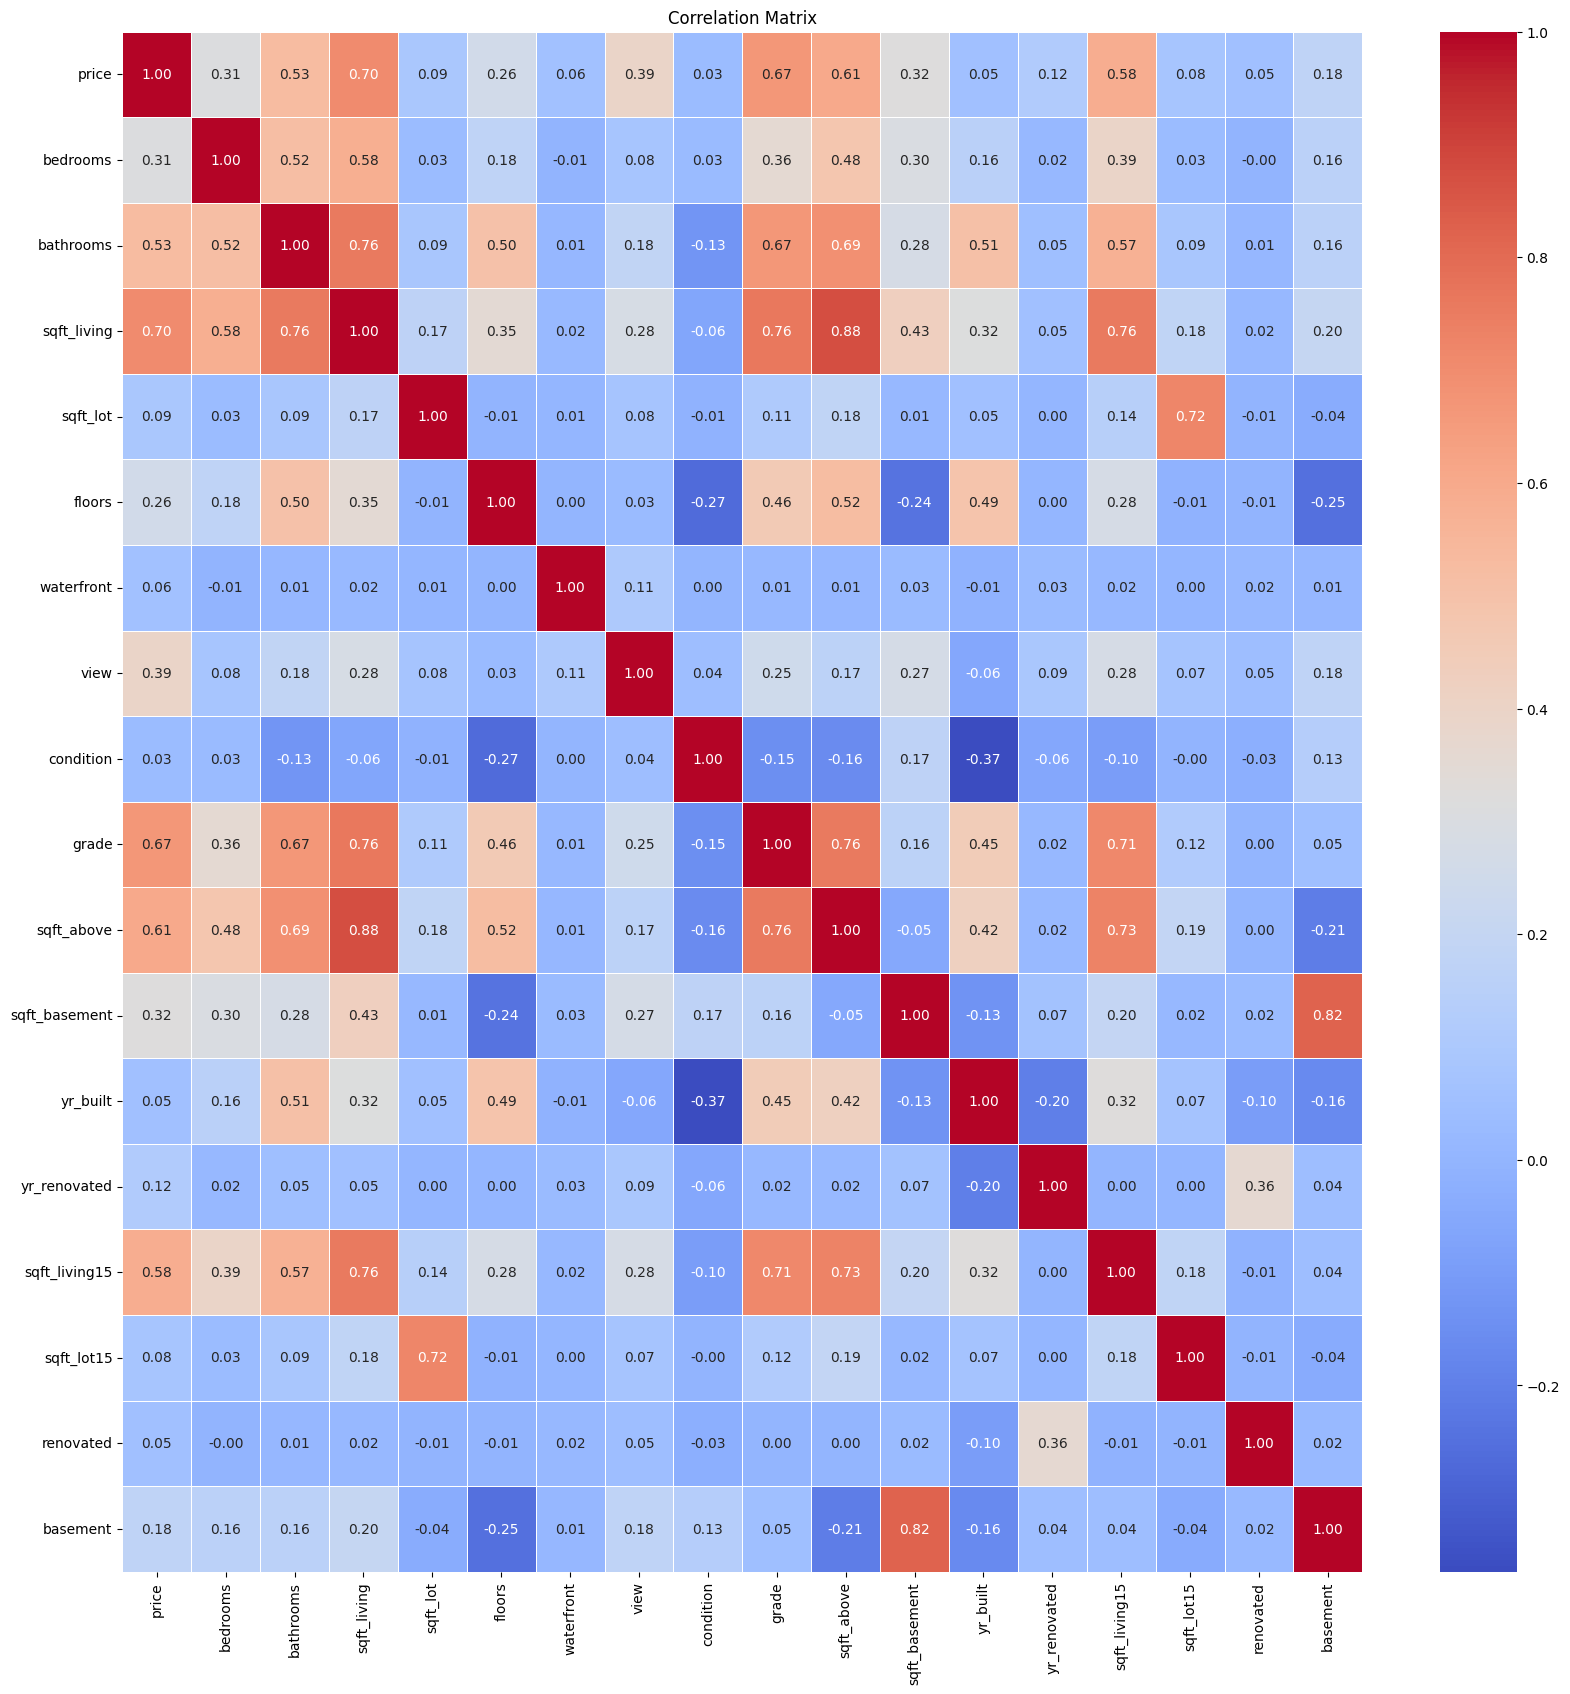

In [ ]:
# Exclude the 'id' column from the correlation matrix
correlation_matrix = df1.drop(columns=['id']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

**CONCLUSION**

Price has a moderate positive correlation with sqft living (0.76), sqft above (0.61), sqft basement (0.32), yr_built (0.45) and sqft living15 (0.71). This means that as the values of these features increase, the price of the house also tends to increase.
There is a weak positive correlation between price and bedrooms (0.31) and bathrooms (0.53).
Price has a weak negative correlation with yr_renovated (-0.05).
It is important to note that correlation does not imply causation. Just because two features are correlated does not mean that one causes the other. There could be a third underlying factor that causes both features to change.

**Distribution Analysis:**

Distribution analysis involves understanding the distribution of data, such as whether it follows a normal distribution and skewed distribution

In [ ]:
from scipy.stats import skew

# Compute skewness for each numerical variable
skewness = df1.apply(lambda x: skew(x.dropna()))

# Select variables with skewness above a certain threshold (e.g., 0.5)
skewed_variables = skewness[abs(skewness) > 0.5].index

# Log transformation for skewed variables
df1_log = df1.copy()  # Create a copy of the original DataFrame to preserve the original data
df1_log[skewed_variables] = df1_log[skewed_variables].apply(lambda x: np.log1p(x))

# Check the distributions before and after transformation if needed
# For example, you can use histograms or density plots to visualize the distributions

# Print the first few rows of the transformed data to verify
print(df1_log.head())

           id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  12.309987  1.386294   0.693147     7.074117  8.639588   
1  6414100192  13.195616  1.386294   1.178655     7.852050  8.887791   
2  5631500400  12.100718  1.098612   0.693147     6.647688  9.210440   
3  2487200875  13.311331  1.609438   1.386294     7.581210  8.517393   
4  1954400510  13.142168  1.386294   1.098612     7.427144  8.997271   

     floors  waterfront  view  condition     grade  sqft_above  sqft_basement  \
0  0.693147    0.693147   0.0   1.098612  2.079442    7.074117       0.000000   
1  1.098612    0.000000   0.0   1.098612  2.079442    7.682943       5.993961   
2  0.693147    0.000000   0.0   1.098612  1.945910    6.647688       0.000000   
3  0.693147    0.000000   0.0   1.609438  2.079442    6.957497       6.814543   
4  0.693147    0.000000   0.0   1.098612  2.197225    7.427144       0.000000   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  renovated  basement  
0   

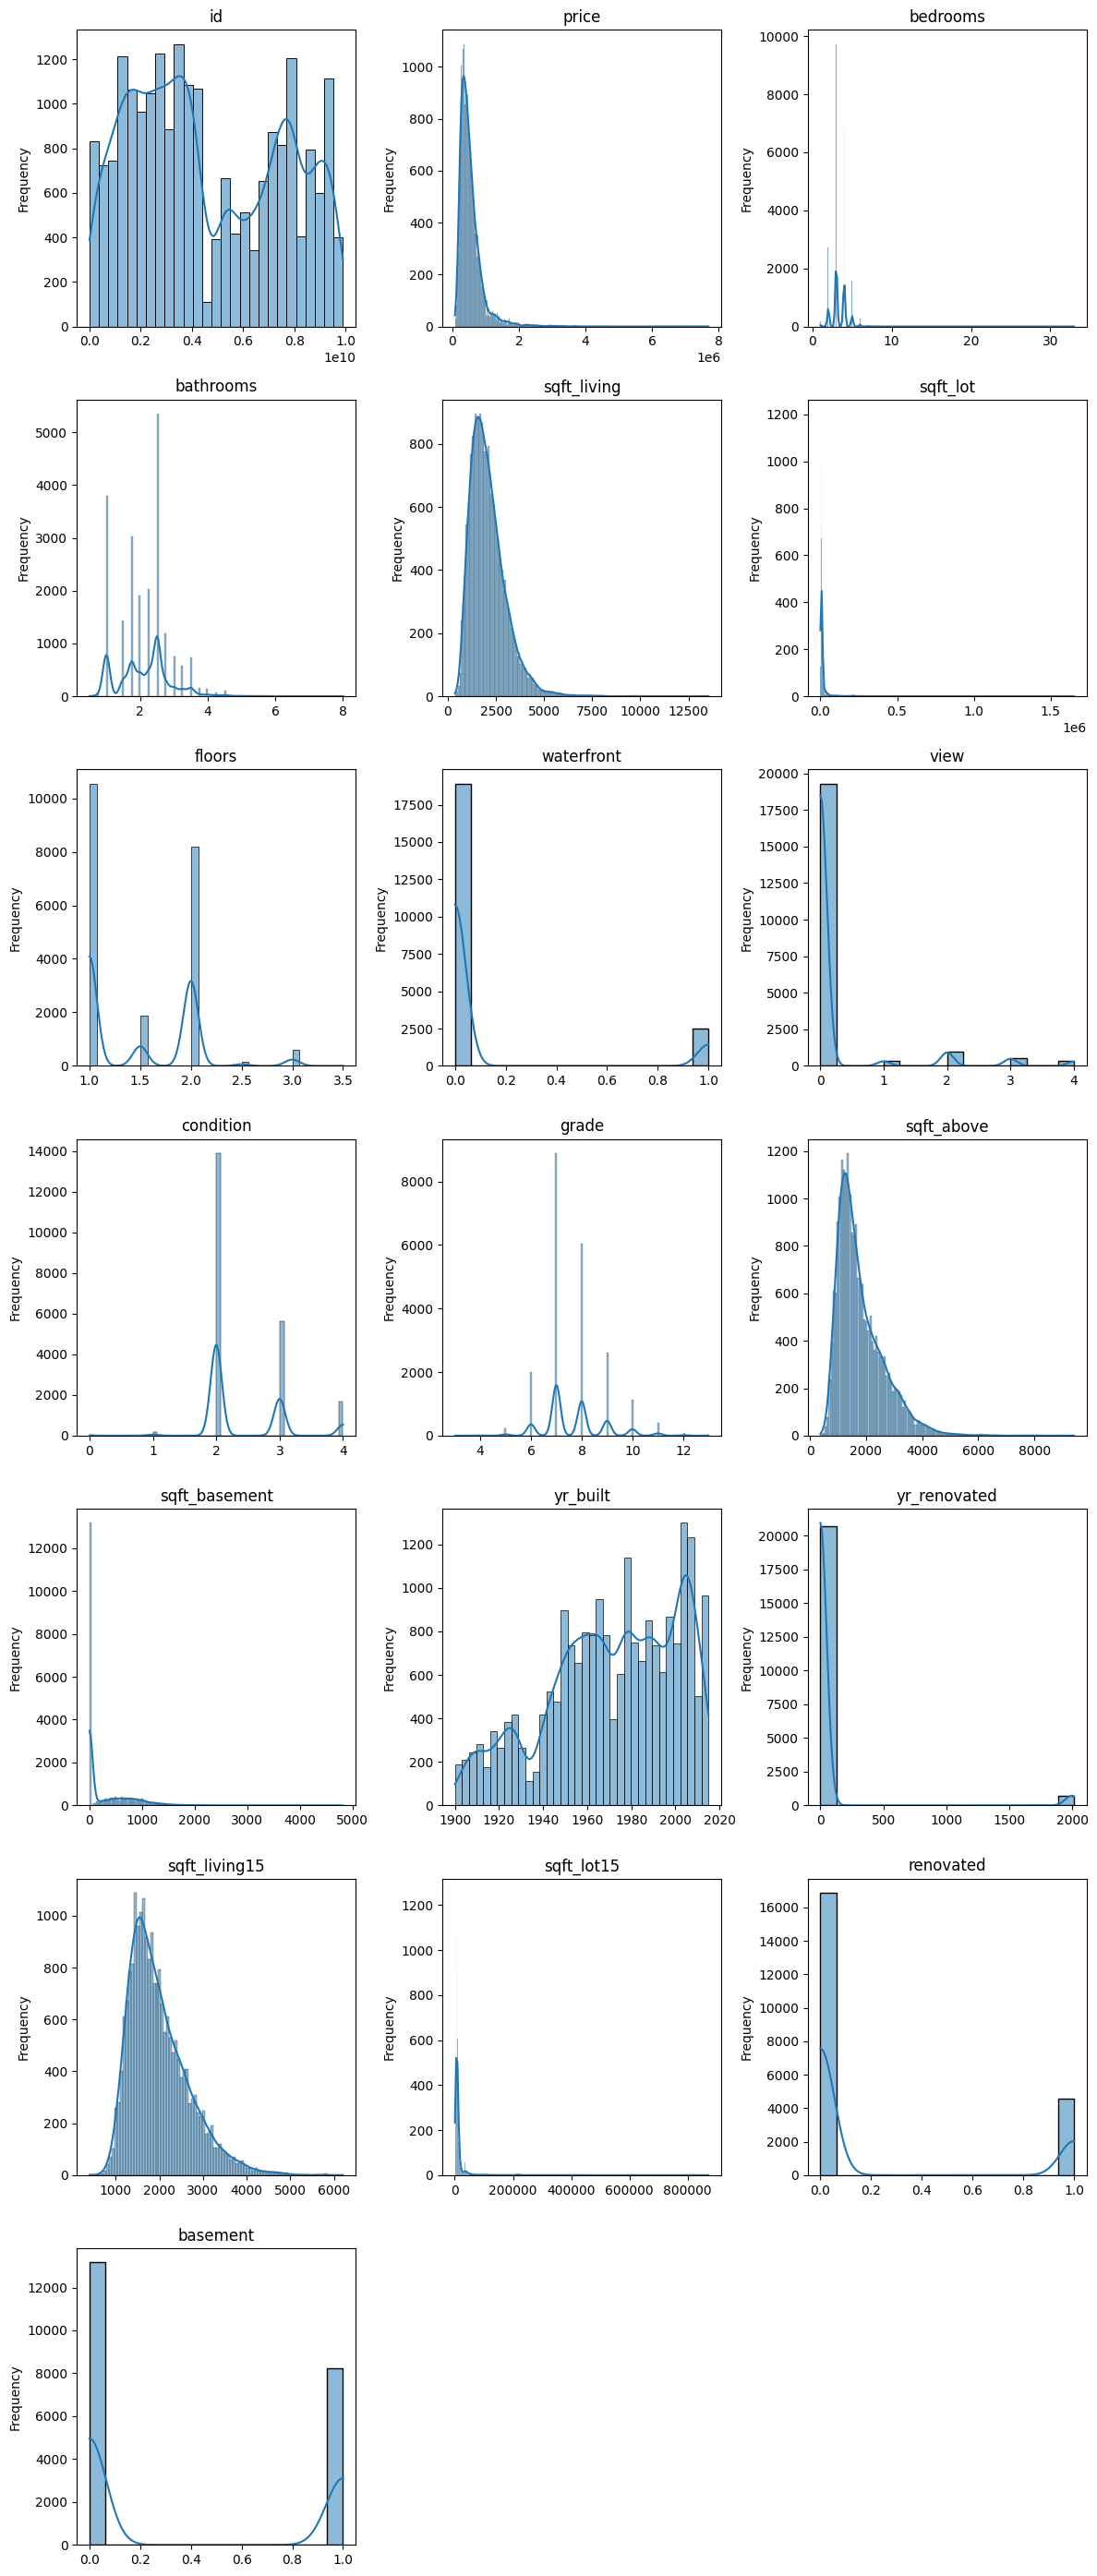

In [ ]:
# Selecting numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed, rounding up

# Plot histograms for numerical variables
plt.figure(figsize=(12, num_rows * 4))  # Adjust the height based on the number of rows
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df1[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Conclusion**

Here are the transformed variables:

price: The distribution of house prices seems to have been skewed before the transformation, with a long tail to the right. After the log transformation, the distribution appears to be more symmetric.
bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15: These variables also showed skewness in their original distributions. After the log transformation, the skewness seems to have been reduced, resulting in more symmetric distributions.
renovated, basement: These are binary variables (0 or 1) indicating whether a house has been renovated or has a basement. Since they are binary, they don't exhibit skewness, and the log transformation doesn't apply to them.
Overall, the log transformation appears to have effectively reduced the skewness in the numerical variables, making their distributions more symmetric and suitable for statistical analysis. However, it's important to note that the transformation alters the scale and interpretation of the variables, so further analysis should be conducted accordingly.

**Inferential Statistics**

In [ ]:
from scipy.stats import f_oneway

# List of features of interest
features_of_interest = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'renovated',
                         'sqft_living15', 'sqft_lot15', 'basement','grade', 'view', 'waterfront', 'condition']

# Create an empty DataFrame to store ANOVA results
anova_results = pd.DataFrame(index=['F-statistic', 'P-value'])

# Perform ANOVA for each feature
significant_features = []

for column in features_of_interest:
    groups = [df1[column][df1['price'] == category]
              for category in df1['price'].unique()]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Store results in the DataFrame
    anova_results[column] = [f_statistic, p_value]

    # Print interpretation
    if p_value < 0.05:
        significant_features.append(column)
        print(f"{column}: Reject the null hypothesis. There is a statistically significant relationship.")
    else:
        print(f"{column}: Fail to reject the null hypothesis. There is no statistically significant relationship.")

# Display ANOVA results
print("\nANOVA Results:")
print(anova_results)

bedrooms: Reject the null hypothesis. There is a statistically significant relationship.
bathrooms: Reject the null hypothesis. There is a statistically significant relationship.
sqft_living: Reject the null hypothesis. There is a statistically significant relationship.
sqft_lot: Fail to reject the null hypothesis. There is no statistically significant relationship.
floors: Reject the null hypothesis. There is a statistically significant relationship.
sqft_above: Reject the null hypothesis. There is a statistically significant relationship.
yr_built: Reject the null hypothesis. There is a statistically significant relationship.
renovated: Fail to reject the null hypothesis. There is no statistically significant relationship.
sqft_living15: Reject the null hypothesis. There is a statistically significant relationship.
sqft_lot15: Fail to reject the null hypothesis. There is no statistically significant relationship.
basement: Reject the null hypothesis. There is a statistically signific

**Conclusion**

The features listed under "Reject the Null Hypothesis" have a statistically significant relationship with housing prices.

These features are important predictors of housing prices in the given dataset.

On the other hand, features listed under "Fail to Reject the Null Hypothesis" do not show a statistically significant relationship with housing prices based on the ANOVA test.

**Multicollinearity**

This will compute the Variance Inflation Factor (VIF) for each predictor variable in your regression model. High VIF values indicate multicollinearity, suggesting that certain variables are highly correlated with each other.
Check for multicollinearity among property characteristics.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute Variance Inflation Factor (VIF) to detect multicollinearity
X = df1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','sqft_lot15', 'renovated', 'basement']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nMultiCollinearity Analysis (VIF):")
print(vif_df)


MultiCollinearity Analysis (VIF):
          feature         VIF
0        bedrooms   23.314138
1       bathrooms   25.442845
2     sqft_living  896.284080
3        sqft_lot    2.358225
4          floors   16.457636
5      waterfront    1.146344
6            view    1.305167
7       condition   15.873836
8           grade  142.311179
9      sqft_above  670.021880
10  sqft_basement   51.019410
11       yr_built  111.779180
12   yr_renovated    1.211552
13  sqft_living15   26.392559
14     sqft_lot15    2.570197
15      renovated    1.464321
16       basement    5.634670


In [ ]:
# creating a function that takes in a dataframe and threshold and returns top correlations
def corr_check(df1, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

result = corr_check(df1, 0.7)
print(result)

                                    cc
pairs                                 
(sqft_living, sqft_above)     0.876533
(sqft_basement, basement)     0.820906
(grade, sqft_living)          0.762477
(sqft_above, grade)           0.756221
(sqft_living, sqft_living15)  0.756186
(sqft_living, bathrooms)      0.755522
(sqft_living15, sqft_above)   0.731887
(sqft_lot, sqft_lot15)        0.717743
(grade, sqft_living15)        0.713178
(price, sqft_living)          0.701875


In [ ]:
df3 = df2.drop(columns=[])
df3

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1,0,2,7,1180,0.0,1955,0.0,1340,5650,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400.0,1951,1991.0,1690,7639,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,2,6,770,0.0,1933,0.0,2720,8062,1,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,1050,910.0,1965,0.0,1360,5000,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,1680,0.0,1987,0.0,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,1530,0.0,2009,0.0,1530,1509,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,2310,0.0,2014,0.0,1830,7200,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,1020,0.0,2009,0.0,1020,2007,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,1,0,2,8,1600,0.0,2004,0.0,1410,1287,0,0


**Conclusion**

The analysis reveals significant multicollinearity among several features, notably 'sqft_living', 'sqft_above', 'grade', 'yr_built', and 'sqft_basement', with VIF values exceeding commonly accepted thresholds. This indicates strong correlations among these variables, potentially leading to unstable coefficient estimates and reduced interpretability in regression models. Consideration should be given to dropping or combining these features, implementing dimensionality reduction techniques, or applying regularization methods to mitigate multicollinearity effects and improve model performance.

# **5.DATA MODELLING**
1.   Baseline Model
2.   Polynomial Regression
1.   Log Transformation





**Baseline Model**

A baseline model is a simple model used as a reference point for comparing the performance of more sophisticated models.

In [ ]:
# Use linear regression
lr = LinearRegression()

In [ ]:
# model need to have only numeric variables.
def only_numeric(data):
    '''returns a dataframe with only numeric values'''
    for column in df3.columns:
        if is_numeric_dtype(data[column]) == False:
            data = data.drop(column, axis=1)
        else:
            continue
    return data

In [ ]:
# Splits a dataframe into X and Y dataframes given a target column.
def get_y_X(data, target):
    '''Returns a series of target (y) value and a dataframe of predictors (X)'''
    y = data[target]  # target varriable
    X = data.drop(target, axis=1)  #Property features
    return y, X

In [ ]:
# Returns training and test R2 & RMSE metrics
def get_metrics(X_tr, X_te, y_tr, y_te):
    ''' Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and returns metrics'''
    lr.fit(X_tr, y_tr)

    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)

    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)

    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))

    return train_score, test_score, train_rmse, test_rmse

In [ ]:
# Prints the metrics of a multiple regression train and test(with option of OLS summary on train data.)
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)

    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)

    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)

    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))

    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')

    stats_summ = input('Do you want a statsmodel summary of the train data? (y/n)')
    if stats_summ == 'y':
        inter = lr.intercept_
        stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
        summary = stats.summary()
        print(summary)

    return

**Train test split**

Train Test Split
The raw data was split to a train and test set for a baseline model. The df2(data after dropping strong multicolinierity) was also split to a train and test set for a fully optimized model.

In [ ]:
# Defining function that splits data into training and testing data.
def train_test(data, size=.25):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set

In [ ]:

# Define the function to filter only numeric columns
def only_numeric(data):
    '''returns a DataFrame with only numeric values'''
    for column in data.columns:
        if not is_numeric_dtype(data[column]):
            data = data.drop(column, axis=1)
    return data

# Create the dataframe for the baseline model and drop missing values
baseline = only_numeric(df)
baseline = baseline.dropna()

# Assuming train_test is a function that splits the data into train and test sets
baseline_train_set, baseline_test_set = train_test(baseline, 0.25)

# Assuming train_test is a function that splits the data into train and test sets for the df1
train_set, test_set = train_test(df3, 0.25)


**Linear Regression Model**

In [ ]:
# Select relevant features
selected_features = ['bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']
# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a basic linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

Mean Squared Error: 44675162792.18972
R-squared: 0.6310776936345524
          Feature    Coefficient
0           const       0.000000
1       bathrooms   24486.020198
2     sqft_living  124438.685165
3          floors   15754.675856
4      waterfront    8869.730499
5            view   54456.352105
6       condition   12345.267908
7           grade  153828.575901
8   sqft_basement    2801.921923
9        yr_built -102220.578567
10   yr_renovated    9582.208981
11  sqft_living15   14357.192815
12      renovated    1737.045374
13       basement    1959.510757


In [ ]:
# Select relevant features
features =['bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']
# Create a design matrix X and target variable y
X = sm.add_constant(df1[features])
y = df3['price']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2817.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:02:26   Log-Likelihood:            -2.9422e+05
No. Observations:               21420   AIC:                         5.885e+05
Df Residuals:                   21406   BIC:                         5.886e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.949e+06   1.41e+05     42.111

**Conclusion**

The model effectively identifies significant factors influencing house prices and offers valuable insights for real estate agencies to advise clients. While it demonstrates moderate performance with a 63.1% R-squared value, further evaluation is needed for predictive accuracy. Nonetheless, the model fulfills the project's objectives by influencing decision-making processes and optimizing marketing strategies based on property characteristics and market trends.

**Multiple Regression**

In [ ]:
# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()
y

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Metrics:
Mean Squared Error (MSE): 44675162792.18974
R-squared (R2) Score: 0.631077693634552


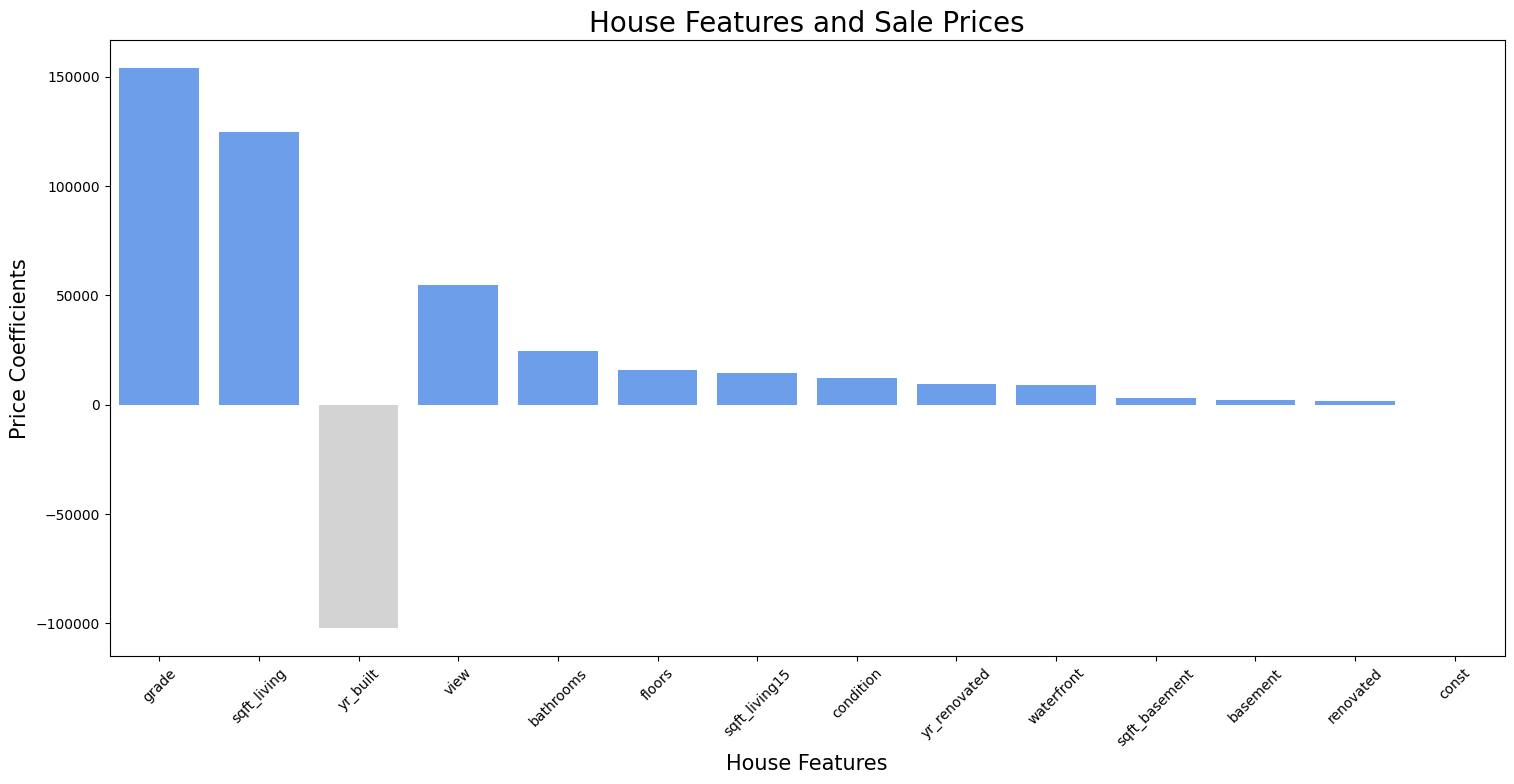

In [ ]:
# Select relevant features
selected_features =['bedrooms','bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']
# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a basic linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Display coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})

# Bar plot for coefficients
inf_coefs = list(zip(coefficients["Feature"], coefficients["Coefficient"]))
inf_coefs.sort(key=lambda x: abs(x[1]), reverse=True)  # Sort coefficients by absolute value

# Create a color palette with the specified color
color = "#589aff"
colors = [color if coef[1] > 0 else "lightgray" for coef in inf_coefs]

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.barplot(x=[x[0] for x in inf_coefs], y=[x[1] for x in inf_coefs], palette=colors)
plt.xticks(rotation=45)
ax.set_ylabel("Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Sale Prices", fontsize=20);

# Display the plot
plt.show()

**Conclusion**

The negative coefficient in yr_built goes to explain that it will cause a decrease in price

**Residual Analysis**

Refined Model - Mean Squared Error: 44675162792.18972
Refined Model - R-squared: 0.6310776936345524
          Feature    Coefficient
0           const       0.000000
1       bathrooms   24486.020198
2     sqft_living  124438.685165
3          floors   15754.675856
4      waterfront    8869.730499
5            view   54456.352105
6       condition   12345.267908
7           grade  153828.575901
8   sqft_basement    2801.921923
9        yr_built -102220.578567
10   yr_renovated    9582.208981
11  sqft_living15   14357.192815
12      renovated    1737.045374
13       basement    1959.510757


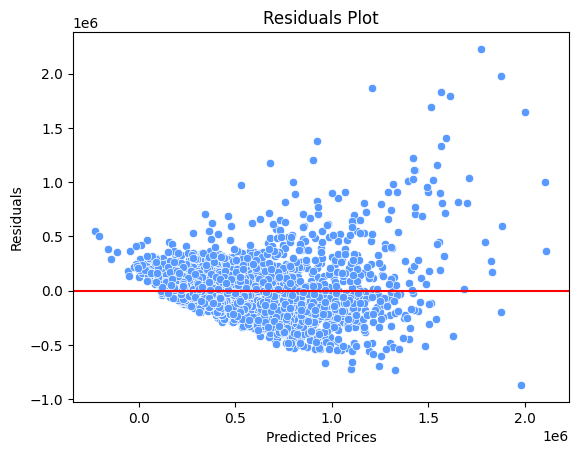

In [ ]:

# Select relevant features
selected_features =  ['bedrooms','bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']
# Filter the dataset
filtered_data = df1[selected_features]

# Handle outliers (example: using z-score)
z_scores = np.abs((filtered_data - filtered_data.mean()) / filtered_data.std())
filtered_data_no_outliers = filtered_data[(z_scores < 3).all(axis=1)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a refined linear regression model
model_refined = LinearRegression()
model_refined.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_refined = model_refined.predict(X_test_scaled)

# Evaluate the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

# Display refined model results
print("Refined Model - Mean Squared Error:", mse_refined)
print("Refined Model - R-squared:", r2_refined)

# Display refined model coefficients
coefficients_refined = pd.DataFrame({"Feature": X.columns, "Coefficient": model_refined.coef_})
print(coefficients_refined)

# Plot residuals for further analysis
residuals = y_test - y_pred_refined
sns.scatterplot(x=y_pred_refined, y=residuals, color='#589aff')
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


**Conclusion**

Key features such as bathrooms, square footage, waterfront views, property condition, grade, and year built demonstrate significant impacts on prices. Although the model achieves a respectable R-squared value of approximately 0.631, indicating a good fit, the mean squared error suggests room for improvement in prediction accuracy.


**Polynomial Regression**
- Polynomial regression involves converting features into higher-order polynomial terms. This method allows us to capture non-linear relationships by utilizing multiple linear regression techniques.

Polynomial Model (Degree 2)- MSE: 35248607685.76943
Polynomial Model (Degree 2)- R-squared: 0.708921091030063


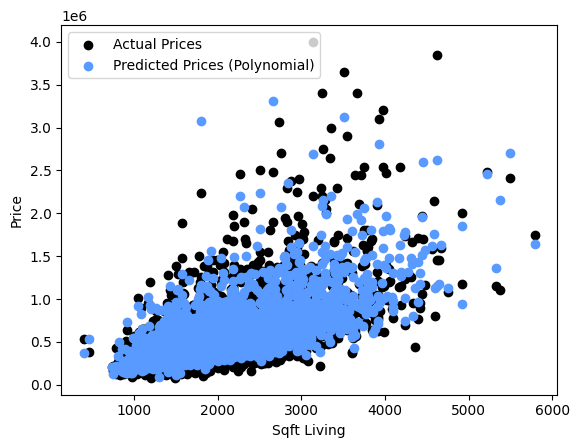

In [ ]:
# Select relevant features
selected_features = ['bedrooms','bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']

# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
# Choose the degree of the polynomial
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Model (Degree {})- MSE:".format(degree), mse_poly)
print("Polynomial Model (Degree {})- R-squared:".format(degree), r2_poly)

# Visualize the results
plt.scatter(X_test["sqft_living15"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living15"], y_pred_poly,color='#589aff', label='Predicted Prices (Polynomial)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

**Multiple Linear regression model using polynomial regression features**

Multiple Linear Regression - MSE: 43669850756.454605
Multiple Linear Regression - R-squared: 0.639379443682236


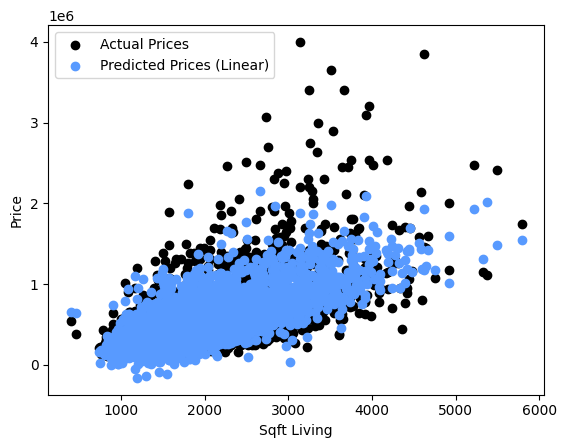

In [ ]:
# Select relevant features
selected_features = ['bedrooms','bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']

# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data, y, test_size=0.2, random_state=42)

# Build a multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the multiple linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression - MSE:", mse_linear)
print("Multiple Linear Regression - R-squared:", r2_linear)

# Visualize the results
plt.scatter(X_test["sqft_living15"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living15"], y_pred_linear, color='#589aff', label='Predicted Prices (Linear)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

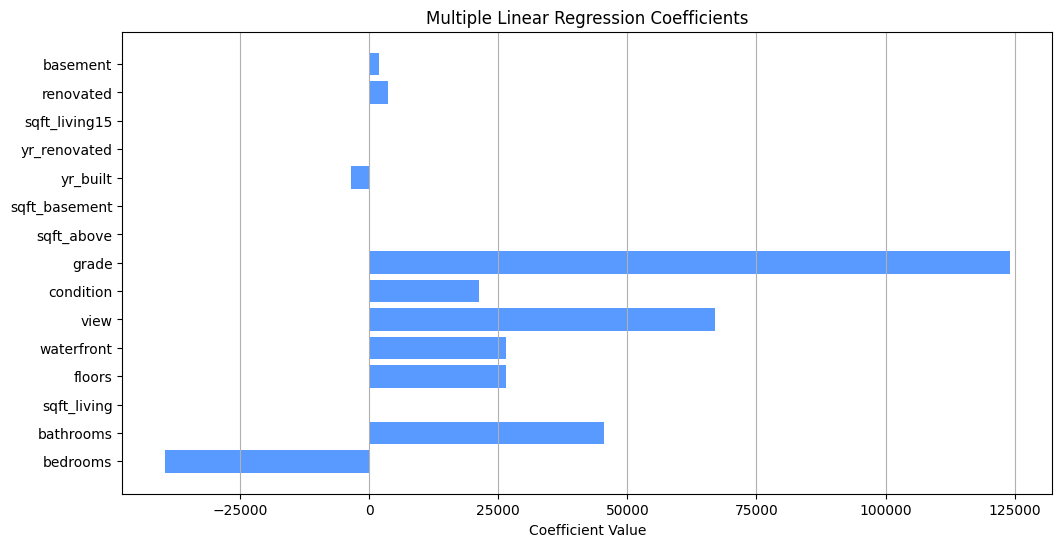

In [ ]:
# Get the coefficients and corresponding feature names
coefficients_linear = linear_model.coef_
feature_names = X_train.columns

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients_linear, color='#589aff')
plt.xlabel('Coefficient Value')
plt.title('Multiple Linear Regression Coefficients')
plt.grid(axis='x')
plt.show()

In [ ]:
# Add a constant term for the intercept
X_train_ols = sm.add_constant(X_train)

# Build a multiple linear regression model using OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display the OLS summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2003.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:59:47   Log-Likelihood:            -2.3546e+05
No. Observations:               17136   AIC:                         4.710e+05
Df Residuals:                   17120   BIC:                         4.711e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.177e+06    1.6e+05     38.705

The polynomial regression analysis offers valuable insights into the determinants of house prices, aligning with the objectives.Key features such as bedrooms, bathrooms, square footage, waterfront views, condition, grade, and year built demonstrate significant impacts on prices. Despite a reasonably high R-squared value, attention is warranted regarding potential multicollinearity issues indicated by some coefficients' p-values. Moving forward, leveraging these findings can enhance decision-making processes, refine marketing strategies, and empower clients to make well-informed investment choices in the dynamic real estate market.

**Log Transformation**

Log transformation to stabilize variance and make the relationship between variables more linear.

Model with Log-Transformed Target - MSE: 40205648196.533844
Model with Log-Transformed Target - R-squared: 0.6679864261361754


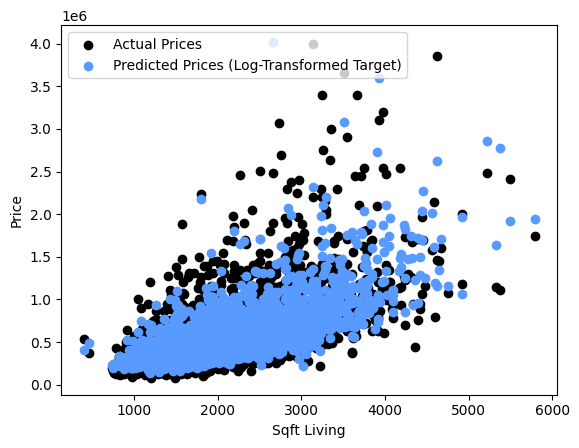

In [ ]:

# Select relevant features
selected_features = ['bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']


# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Transformation
# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Build a linear regression model using log-transformed target variable
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model with log-transformed target variable
mse_log = mean_squared_error(y_test, y_pred_original)
r2_log = r2_score(y_test, y_pred_original)
print("Model with Log-Transformed Target - MSE:", mse_log)
print("Model with Log-Transformed Target - R-squared:", r2_log)

# Visualize the results (for demonstration purposes)
plt.scatter(X_test["sqft_living15"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living15"], y_pred_original,color='#589aff', label='Predicted Prices (Log-Transformed Target)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

**Multiple linear regression model using the log transformed data**

Model with Log-Transformed Target - MSE: 40205648196.533844
Model with Log-Transformed Target - R-squared: 0.6679864261361754
          Feature  Coefficient
0           const     0.000000
1       bathrooms     0.061067
2     sqft_living     0.000100
3          floors     0.115432
4      waterfront     0.016777
5            view     0.059459
6       condition     0.045726
7           grade     0.209067
8   sqft_basement    -0.000035
9        yr_built    -0.005206
10   yr_renovated     0.000029
11  sqft_living15     0.000113
12      renovated     0.003294
13       basement     0.121698
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2522.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:         

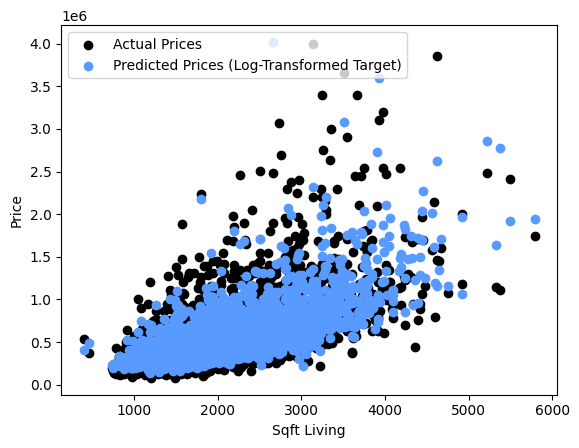

In [ ]:
# Select relevant features
selected_features =['bedrooms','bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15','renovated', 'basement']
# Filter the dataset
filtered_data = df1[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Transformation
# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Build a multiple linear regression model using log-transformed target variable
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model with log-transformed target variable
mse_log = mean_squared_error(y_test, y_pred_original)
r2_log = r2_score(y_test, y_pred_original)
print("Model with Log-Transformed Target - MSE:", mse_log)
print("Model with Log-Transformed Target - R-squared:", r2_log)

# Display refined model coefficients
coefficients_log = pd.DataFrame({"Feature": X.columns, "Coefficient": model_log.coef_})
print(coefficients_log)

# Perform OLS and display summary
X_train_ols = sm.add_constant(X_train)
 # Add a constant term to the independent variables
model_ols = sm.OLS(y_train_log, X_train_ols)
results_ols = model_ols.fit()
print(results_ols.summary())

# Visualize the results
plt.scatter(X_test["sqft_living15"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living15"], y_pred_original, color='#589aff', label='Predicted Prices (Log-Transformed Target)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()

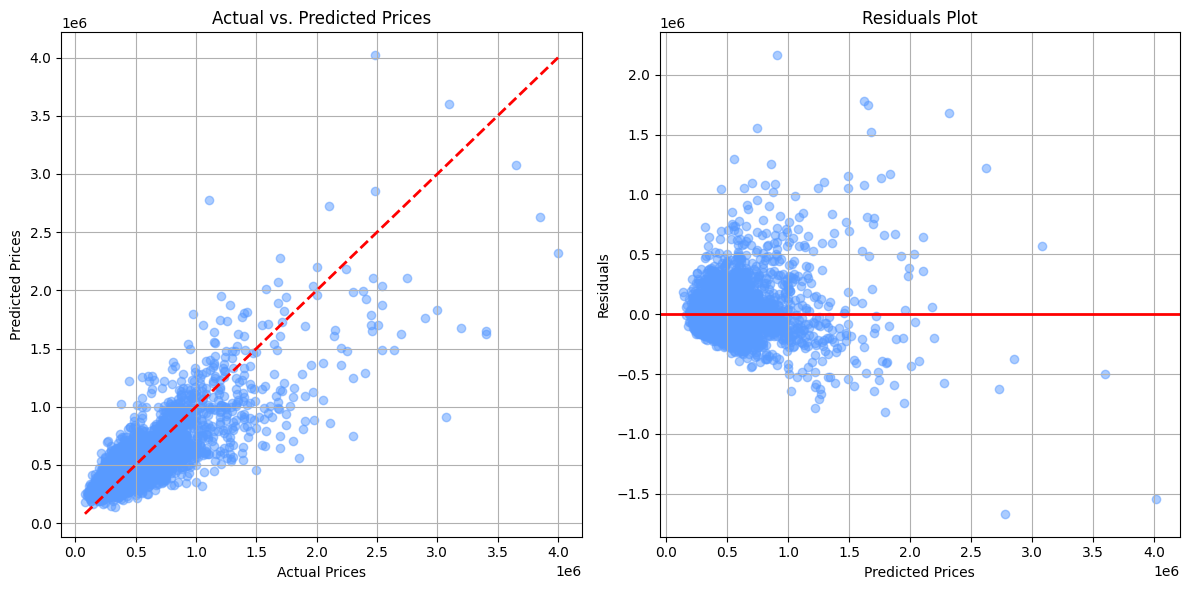

In [ ]:
# Visualization of Model Performance
plt.figure(figsize=(12, 6))

# Scatterplot of Actual vs. Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_original, color='#589aff', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

# Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_original
plt.scatter(y_pred_original, residuals, color='#589aff', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

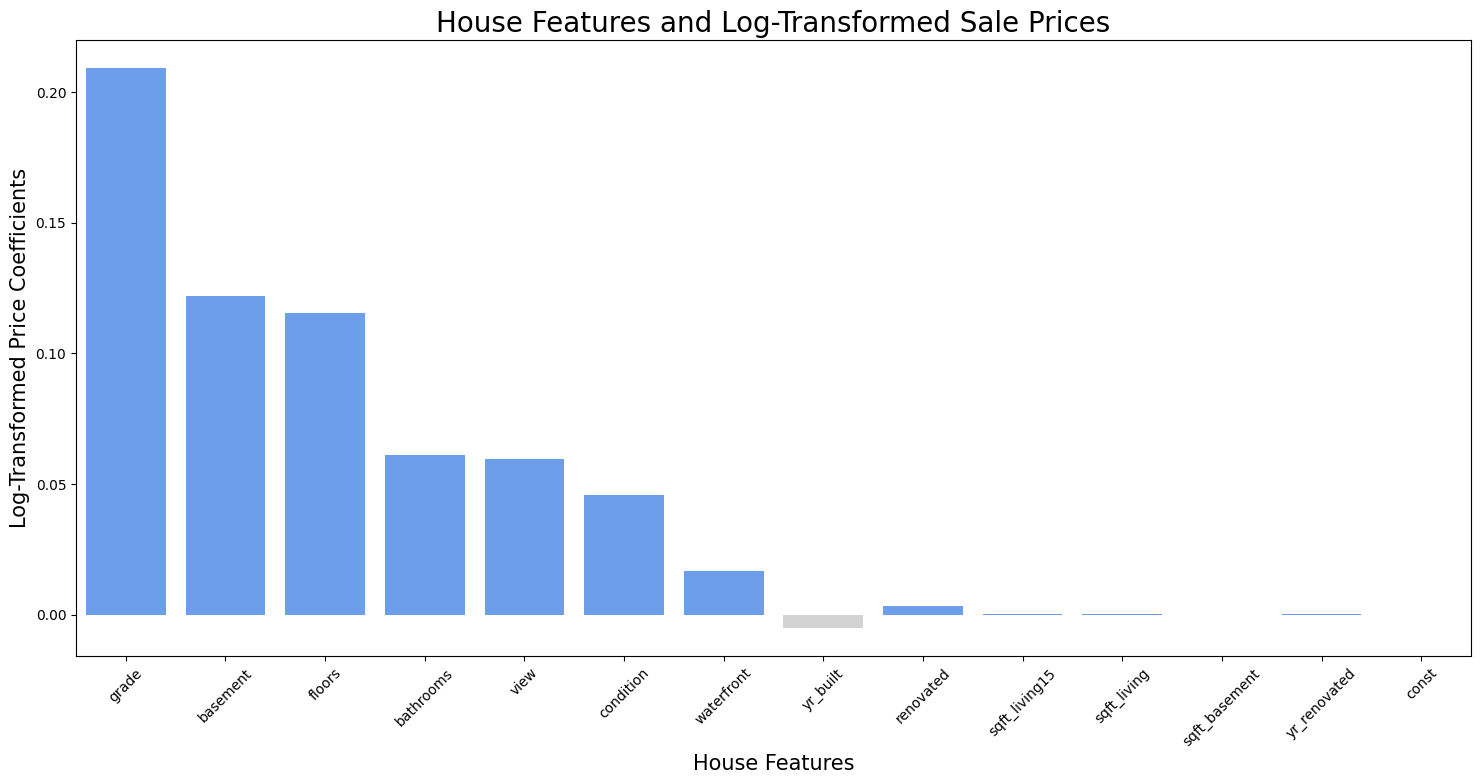

In [ ]:
# Visualize coefficients from the multiple linear regression with log-transformed target
fig, ax = plt.subplots(figsize=(18, 8))

# Sort coefficients by absolute value
coefficients_log["abs_coefficient"] = np.abs(coefficients_log["Coefficient"])
coefficients_log = coefficients_log.sort_values("abs_coefficient", ascending=False)

# Bar plot for coefficients
colors = ["#589aff" if coef > 0 else "lightgray" for coef in coefficients_log["Coefficient"]]
ax = sns.barplot(x="Feature", y="Coefficient", data=coefficients_log, palette=colors)
plt.xticks(rotation=45)

ax.set_ylabel("Log-Transformed Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Log-Transformed Sale Prices", fontsize=20)

# Display the plot
plt.show()

The analysis conducted on the dataset reveals crucial insights into the determinants of house prices, aligning with the objectives of aiding real estate agencies in advising clients on property investments. Key features such as square footage, number of bathrooms, location-related attributes, and property condition significantly impact prices. The model's performance, with a respectable R-squared value and mean squared error, underscores its effectiveness in predicting house prices. Moving forward, leveraging these findings can empower real estate agencies to offer tailored recommendations, optimize marketing strategies, and ultimately enhance decision-making processes for clients navigating the dynamic real estate market.

# **REGRESSION RESULTS**

Polynomial Regression is the preferred model beacuse from the evaluation it has the highest R-squared value of 0.71

The features below impact price such that an increase will cause an increase in the price of the property.
'bedrooms','bathrooms', 'sqft_living','floors', 'waterfront','view''condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15','renovated', 'basement'.

On the other hand yr_built has a negative impact on price since the older the house the lower value it has which is shown by its negatice coefficient

# **CONCLUSIONS**

**Limitations**
1.   The dataset could have more property based characteristics
2.   Multicollinearity:The presence of correlated predictors (e.g., square footage and number of bedrooms) can lead to multicollinearity issues, making it challenging to interpret the individual effects of each feature accurately

1. Assumption Violations:Polynomial regression assumes linearity between predictors and the target variable, which may not hold true in all cases. Violations of this assumption can lead to biased estimates and unreliable predictions.

1. Overfitting: Polynomial regression models, particularly those with high degrees, are susceptible to overfitting, where the model fits the training data too closely and may not generalize well to unseen data.




Overall the model was the best fit model for this prediction


# **RECOMENDATIONS**

1.   Feature Enrichment: Enhance the dataset with additional property-based characteristics like property to amenities and architectural style to provide a more comprehensive understanding of factors influencing house prices.

2.   Multicollinearity Management: Address multicollinearity by employing techniques such as feature selection, principal component analysis (PCA), or regularization methods like ridge regression or Lasso regression to prioritize important predictors and stabilize the model's interpretability.

1.   Assumption Validation: Before using polynomial regression, verify the linearity assumption between predictors and the target variable. If non-linearity is observed, explore alternative regression techniques like generalized additive models (GAMs) or spline regression for better capturing complex relationships.
2. Overfitting Prevention: Prevent overfitting by balancing model complexity and generalizability through techniques such as cross-validation, regularization, or model selection criteria. Consider collecting more data or using bootstrapping to improve robustness and reduce noise in the model.



